In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('users.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


# Расчёты:
Для параметров hour, distance и ag
1.  найдите средего;
2.  просчитайте меаны
3. 
· вычислите дисперсию.

In [99]:
# Проверка на путые значения
df.isna().sum()

user_id                  0
hour                     0
os                       0
order_class              0
surge                10069
app_opened               0
price_seen               0
order_made               0
ride_completed           0
user_cancelled           0
city_center_order        0
distance             10069
age                      0
rfm                      0
dtype: int64

In [100]:
df.dropna(subset=['distance'], inplace=True)
df.isna().sum()

user_id              0
hour                 0
os                   0
order_class          0
surge                0
app_opened           0
price_seen           0
order_made           0
ride_completed       0
user_cancelled       0
city_center_order    0
distance             0
age                  0
rfm                  0
dtype: int64

In [101]:
# Нахождение среднего значения (mean) и медианы (50%) 
df.describe()
# В данных четное кол-во значений, кроме параметра distance

,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,91431.000000,91431.000000,91431.0,91431.0,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000
mean,550108.136114,11.481204,1.0,1.0,0.811935,0.688683,0.123251,0.580667,5.371152,25.876464
std,258534.002859,6.921583,0.0,0.0,0.390766,0.463035,0.328727,0.493453,4.118531,7.794166
min,100093.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.010946,18.000000
25%,328294.000000,5.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,2.438335,20.000000
50%,549215.000000,11.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,4.279565,24.000000
75%,773095.000000,17.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,7.129814,29.000000
max,999978.000000,23.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,40.268966,69.000000


In [102]:
# Расчет дисперсии
df[['hour', 'distance', 'age']].var()

hour        47.908317
distance    16.962294
age         60.749028
dtype: float64

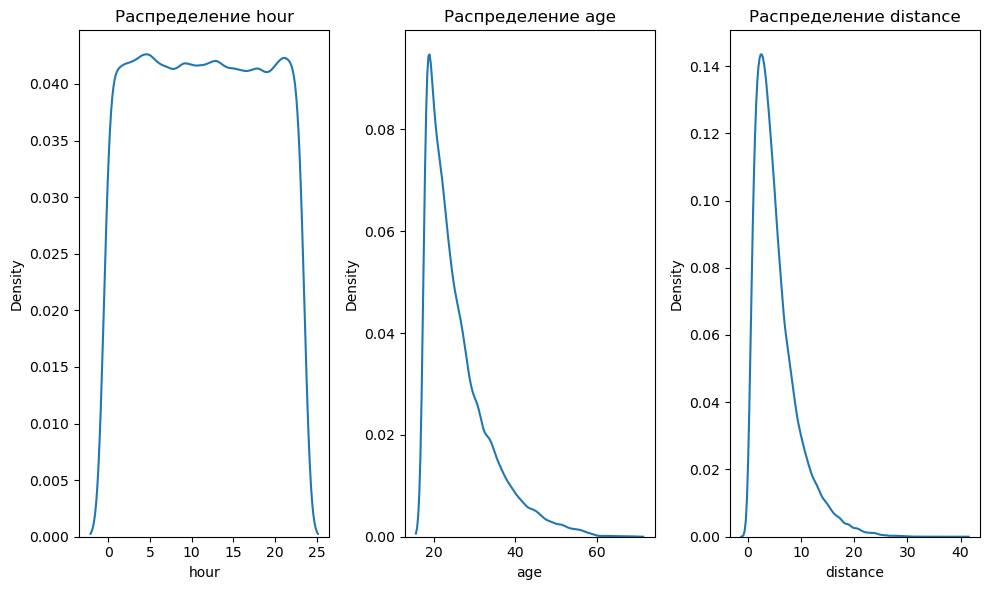

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

sns.kdeplot(df['hour'], ax=ax[0])
ax[0].set_title('Распределение hour')

sns.kdeplot(df['age'], ax=ax[1])
ax[1].set_title('Распределение age')

sns.kdeplot(df['distance'], ax=ax[2])
ax[2].set_title('Распределение distance')

plt.tight_layout()
plt.show()

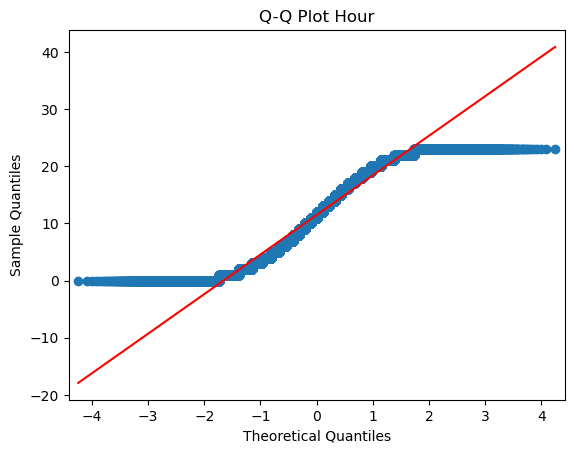

In [104]:
sm.qqplot(df['hour'], line='s') 
plt.title('Q-Q Plot Hour')
plt.show()

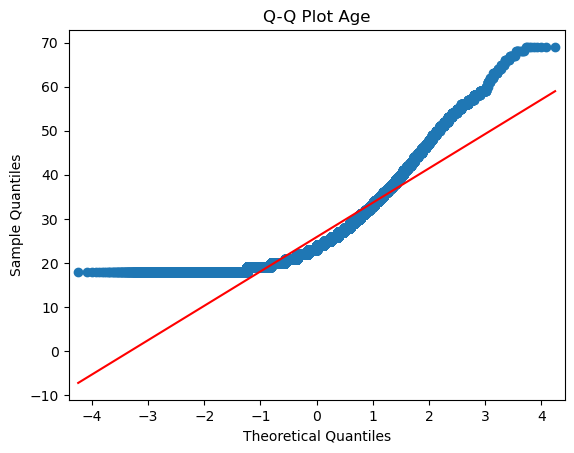

In [105]:
sm.qqplot(df['age'], line='s') 
plt.title('Q-Q Plot Age')
plt.show()

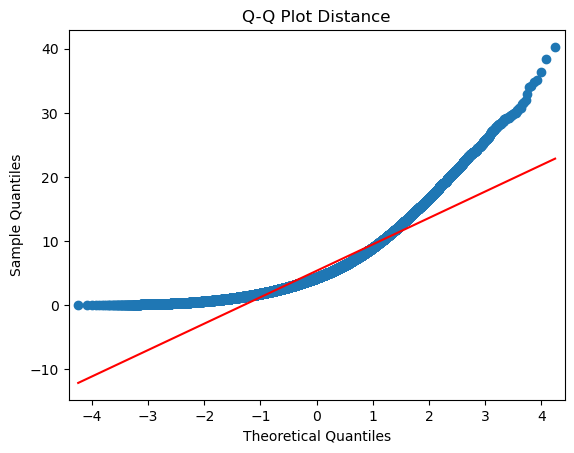

In [106]:
sm.qqplot(df['distance'], line='s') 
plt.title('Q-Q Plot Distance')
plt.show()

In [107]:
import scipy.stats as stats
from scipy.stats import shapiro

In [110]:
def shapiro_calculation(row):
    stat, pval = shapiro(row)
    if pval < 0.05: 
        print(f'Данные распределены номрально. Stat = {stat}, pval = {pval}')
    else:
        print('Данные распредлены ненормально')
    print('-'*10)

In [112]:
print('hour')
shapiro_calculation(df['hour'])
print('age')
shapiro_calculation(df['age'])
print('distance')
shapiro_calculation(df['distance'])

hour
Данные распределены номрально. Stat = 0.9508157790783319, pval = 6.317164023625256e-92
----------
age
Данные распределены номрально. Stat = 0.8520514146365725, pval = 3.1418406782649213e-121
----------
distance
Данные распределены номрально. Stat = 0.8667652152184815, pval = 2.895295598288093e-118
----------
